In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.metrics import classification_report_imbalanced
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
# Load dataset (not encoded via OHE) in to DataFrame

df = pd.read_csv("Resources/adult.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,govt_worker,never_worked,private_worker,self_employed,rural_residence,urban_residence,smoking_unknown,former_smoker,never_smoked,current_smoker
0,9046,1,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,1,0,1,0,0
1,31112,1,80.0,0,1,1,105.92,32.5,1,0,0,1,0,1,0,0,0,1,0
2,60182,0,49.0,0,0,1,171.23,34.4,1,0,0,1,0,0,1,0,0,0,1
3,1665,0,79.0,1,0,1,174.12,24.0,1,0,0,0,1,1,0,0,0,1,0
4,56669,1,81.0,0,0,1,186.21,29.0,1,0,0,1,0,0,1,0,1,0,0


In [3]:
# Get columns

df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'govt_worker', 'never_worked',
       'private_worker', 'self_employed', 'rural_residence', 'urban_residence',
       'smoking_unknown', 'former_smoker', 'never_smoked', 'current_smoker'],
      dtype='object')

In [4]:
# Drop id column

df.drop(columns=["id"], inplace=True)

In [5]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,govt_worker,never_worked,private_worker,self_employed,rural_residence,urban_residence,smoking_unknown,former_smoker,never_smoked,current_smoker
0,1,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,1,0,1,0,0
1,1,80.0,0,1,1,105.92,32.5,1,0,0,1,0,1,0,0,0,1,0
2,0,49.0,0,0,1,171.23,34.4,1,0,0,1,0,0,1,0,0,0,1
3,0,79.0,1,0,1,174.12,24.0,1,0,0,0,1,1,0,0,0,1,0
4,1,81.0,0,0,1,186.21,29.0,1,0,0,1,0,0,1,0,1,0,0


In [6]:
# Scale the age, glucose, and bmi columns using StandardScaler

from sklearn.preprocessing import StandardScaler

cols_to_scale = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,govt_worker,never_worked,private_worker,self_employed,rural_residence,urban_residence,smoking_unknown,former_smoker,never_smoked,current_smoker
0,1,0.961233,0,1,1,2.579605,0.852506,1,0,0,1,0,0,1,0,1,0,0
1,1,1.692041,0,1,1,-0.036015,0.285758,1,0,0,1,0,1,0,0,0,1,0
2,0,-0.050654,0,0,1,1.355417,0.548398,1,0,0,1,0,0,1,0,0,0,1
3,0,1.635825,1,0,1,1.416989,-0.889207,1,0,0,0,1,1,0,0,0,1,0
4,1,1.748257,0,0,1,1.674567,-0.198051,1,0,0,1,0,0,1,0,1,0,0


In [7]:
#Create our features, dropping the target feature, Stroke, as well as the never_worked column as it statistically insignificant

X = df.drop(columns=["stroke", "never_worked"])
y = df["stroke"]

In [9]:
# Check balance of target feature (0=no stroke, 1=stroke)

y.value_counts()

0    3865
1     208
Name: stroke, dtype: int64

In [10]:
#Balance/resample data set due to heavy imbalance of '0' and '1' values.

from imblearn.over_sampling import SMOTE

os = SMOTE()
X,y = os.fit_resample(X,y)

In [11]:
# Check to see if balanced

y.value_counts()

1    3865
0    3865
Name: stroke, dtype: int64

In [12]:
# Split data in to training/testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# RandomForestClassifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [14]:
# Initialize and Fit RandomForestclassifier to the data

clf = RandomForestClassifier(n_estimators=100, random_state=1)
clf.fit(X_train,y_train)

# Display training and testing scores

print(f"Training Score: {clf.score(X_train, y_train)}")
print(f"Testing Score: {clf.score(X_test, y_test)}")

Training Score: 1.0
Testing Score: 0.9384376616658044


In [15]:
# Save the feature importances from the Random Forests classifier model to a variable named feature_importances

feature_importances = clf.feature_importances_

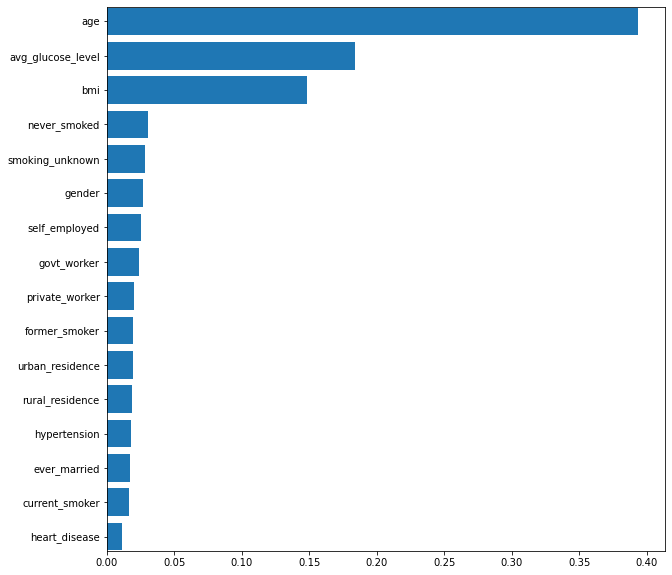

In [16]:
# Plot the most important features

features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [17]:
# Create confusion matrix

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[878  97]
 [ 22 936]]


In [18]:
# Extract cm values

tn, fp, fn, tp = cm.ravel()

In [19]:
# Calculate the precision of the model based on the confusion matrix

precision = tp / [tp + fp]
print(f"Precision : {precision}")

Precision : [0.90609874]


In [22]:
# Calculate the sensitivity/recall of the model based on the confusion matrix

sensitivity = tp / [tp + fn]
print(f"Sensitivity: {sensitivity}")

Sensitivity: [0.97703549]


In [23]:
# Calculate the F1 score of the model based on the confusion matrix

f1 = 2*(sensitivity*precision)/(precision+sensitivity)
print(f"F1 : {f1}")

F1 : [0.94023104]


# Logistic Regression

In [24]:
# Initialize LR classifier

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='lbfgs',max_iter=200,random_state=1)

In [25]:
# Fit/train the model to the data

classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [27]:
# Store predicted values in variable

y_pred = classifier.predict(X_test)

In [28]:
# Print accuracy score

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.8173823072943611


In [29]:
# Create new df to check actual vs predicted values

df_lr = pd.DataFrame()
df_lr["Actual"] = y_test
df_lr["pred"] = y_pred

In [31]:
# Check # of rows where model correct predicted stroke cases

df_lr.loc[(df_lr["pred"]==1) & (df_lr["Actual"]==1)]

,Actual,pred
5673,1,1
5924,1,1
6054,1,1
4493,1,1
130,1,1
...,...,...
7692,1,1
7138,1,1
6386,1,1
6829,1,1


In [33]:
# Check # of rows where model failed to predict stroke cases (False Negative)

df_lr.loc[(df_lr["pred"]==0) & (df_lr["Actual"]==1)]

,Actual,pred
6447,1,0
4258,1,0
186,1,0
6224,1,0
4228,1,0
...,...,...
5322,1,0
5,1,0
6861,1,0
101,1,0


In [34]:
# Display confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[790 185]
 [168 790]]


In [35]:
# Extract cm values

tn, fp, fn, tp = cm.ravel()

In [36]:
# Calculate the precision of the model based on the confusion matrix

precision = tp / [tp + fp]
print(f"Precision : {precision}")

Precision : [0.81025641]


In [37]:
# Calculate the sensitivity of the model based on the confusion matrix

sensitivity = tp / [tp + fn]
print(f"Sensitivity: {sensitivity}")

Sensitivity: [0.82463466]


In [38]:
# Calculate the F1 score of the model based on the confusion matrix

f1 = 2*(sensitivity*precision)/(precision+sensitivity)
print(f"F1 : {f1}")

F1 : [0.81738231]


# Neural Networks

In [39]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [40]:
# Define the deep learning model 

nn_model = tf.keras.models.Sequential()

# Add hidden and output layers

nn_model.add(tf.keras.layers.Dense(units=54, activation="relu", input_dim=16))
nn_model.add(tf.keras.layers.Dense(units=54, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics

nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model

fit_model = nn_model.fit(X_train, y_train, epochs=100)



Epoch 1/100
182/182 [==============================] - 1s 1ms/step - loss: 0.5084 - accuracy: 0.7576
Epoch 2/100
182/182 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.7963
Epoch 3/100
182/182 [==============================] - 0s 1ms/step - loss: 0.3768 - accuracy: 0.8311
Epoch 4/100
182/182 [==============================] - 0s 1ms/step - loss: 0.3428 - accuracy: 0.8541
Epoch 5/100
182/182 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.8715
Epoch 6/100
182/182 [==============================] - 0s 1ms/step - loss: 0.2921 - accuracy: 0.8770
Epoch 7/100
182/182 [==============================] - 0s 2ms/step - loss: 0.2737 - accuracy: 0.8901
Epoch 8/100
182/182 [==============================] - 0s 2ms/step - loss: 0.2630 - accuracy: 0.8894
Epoch 9/100
182/182 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.8975
Epoch 10/100
182/182 [==============================] - 0s 2ms/step - loss: 0.2439 - accura

182/182 [==============================] - 0s 2ms/step - loss: 0.1128 - accuracy: 0.9579
Epoch 82/100
182/182 [==============================] - 0s 2ms/step - loss: 0.1114 - accuracy: 0.9591
Epoch 83/100
182/182 [==============================] - 0s 1ms/step - loss: 0.1126 - accuracy: 0.9577
Epoch 84/100
182/182 [==============================] - 0s 1ms/step - loss: 0.1108 - accuracy: 0.9589
Epoch 85/100
182/182 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.9639
Epoch 86/100
182/182 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9602
Epoch 87/100
182/182 [==============================] - 0s 2ms/step - loss: 0.1021 - accuracy: 0.9641
Epoch 88/100
182/182 [==============================] - 0s 1ms/step - loss: 0.1114 - accuracy: 0.9558
Epoch 89/100
182/182 [==============================] - 0s 1ms/step - loss: 0.1056 - accuracy: 0.9620
Epoch 90/100
182/182 [==============================] - 0s 1ms/step - loss: 0.1105 - accuracy: 

In [41]:
# Evaluate the model using the test data

model_loss, model_accuracy = nn_model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

61/61 - 0s - loss: 0.2533 - accuracy: 0.9229 - 229ms/epoch - 4ms/step
Loss: 0.25329264998435974, Accuracy: 0.9229177236557007
